In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv('fulldata.csv')

In [5]:
df.head()

,Station,Day(Local_Date),WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(C),TWet(C),...,Tgmin(C),ET05(C),ET10(C),ET20(C),ET30(C),ET100(C),Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2)
0,41351,20200101:0000,317,1.8,224,8.2,270,0.0,18.8,16.6,...,9.3,-,19.7,19.6,-,19.1,1018.6,1016.7,6.9,19.03
1,41351,20200102:0000,226,3.5,196,11.8,324,0.0,17.8,15.6,...,13.3,-,19.2,19.6,-,19.1,1014.6,1012.7,9.4,21.61
2,41351,20200103:0000,266,4.5,216,12.4,432,0.0,20.5,18.3,...,12.6,-,20.3,19.8,-,19.1,1008.0,1006.1,9.3,20.18
3,41351,20200104:0000,222,6.5,215,15.4,462,0.0,17.8,13.2,...,13.8,-,18.4,19.2,-,19.2,1008.7,1006.8,7.2,18.62
4,41351,20200105:0000,246,3.8,298,11.8,394,3.2,18.0,13.7,...,11.2,-,18.4,18.5,-,19.2,1012.5,1010.6,4.3,10.36


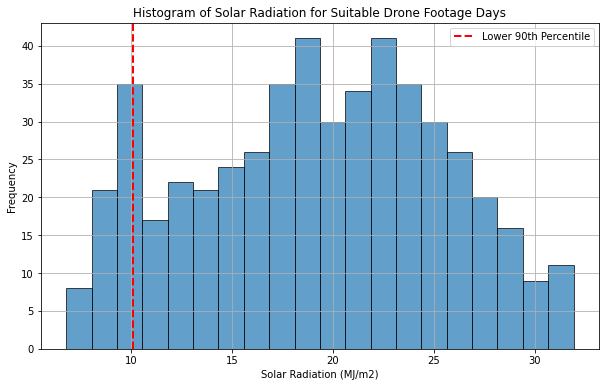

In [6]:
# Filter data for no rain, sufficient sunlight, and low wind speed
filtered_df = df[(df['Rain(mm)'] == 0) & (df['Sun(Hrs)'] > 6) & (df['WSpd(m/s)'] < 7)]

# Calculate the lower 90th percentile of solar radiation
lower_percentile = filtered_df['Rad(MJ/m2)'].quantile(0.1)

# Plot histogram of solar radiation
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(filtered_df['Rad(MJ/m2)'], bins=20, edgecolor='black', alpha=0.7)  # Adjust alpha for semi-transparency

# Plot the vertical bar at the lower 90th percentile
plt.axvline(x=lower_percentile, color='r', linestyle='dashed', linewidth=2, label='Lower 90th Percentile')

plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Frequency')
plt.title('Histogram of Solar Radiation for Suitable Drone Footage Days')
plt.grid(True)
plt.legend()  # Add legend for the vertical bar
plt.savefig('radhist.png')
plt.show()


In [8]:
def can_I_fly(weather):
    """ This function checks a weather observation and returns if it is okay to fly a DJI Mavic 2 drone or not 
    """
    canifly = True
    if weather['Sun(Hrs)'] < 5: canifly = False
    if weather['Rad(MJ/m2'] < 10.5: canifly = False
    if not weather['Rain(mm)'] == 0: canifly = False
    if weather['WSpd(m/s)'] > 7: canifly = False # Determined from DJI website for the Mavic 2

# Timeseries weather forecasting

In [1]:
import keras

C:\Users\Iva Wright\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
class stn_weather:
    def __init__(self, og_df, split):
        # Check that dataset is of correct shape 
#         try: 
#             assert og_df.columns.to_numpy() == np.array(['Station', 'Day(Local_Date)', 'WDir(Deg)', 'WSpd(m/s)',
#        'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)', 'Rain(mm)',
#        'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 'Tgmin(C)',
#        'ET05(C)', 'ET10(C)', 'ET20(C)', 'ET30(C)', 'ET100(C)',
#        'Pmsl(hPa)', 'Pstn(hPa)', 'Sun(Hrs)', 'Rad(MJ/m2)'])
#         except:
#             raise Exception('Incorrectly formatted dataframe error')
            
        # Drop any not required features
        self.station = og_df['Station'][0]
        self.full_df = og_df.drop('Station', axis=1)
        
        # Split data into train, test sets
        train_split = int(split * int(og_df.shape[0]))
        # Past = using data from past 7 days
        # Future = predict weather in the next 7 days
        past = 7
        future = 5 
        start = past + future
        end = start + train_split
        
        self.full_df = self.normalise(self.full_df, split)        
        self.train = self.full_df.loc[0 : train_split - 1]
        self.test = self.full_df.loc[train_split :]
        
        self.x_train = self.train[[x for x in range]]
        
    def normalise(self, data, tt_split):
        """Since every feature varies on a range, normalise data before training NN"""
        mean = data[:tt_split-1].mean(axis=0)
        std  = data[:tt_split-1].std(axis=0)
        
        return (data - mean) / std

In [ ]:
# Heatmap -> select features

In [37]:
stn_weather(df, 20)

C:\Users\Iva Wright\AppData\Local\Temp\ipykernel_14908\1029789145.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data[:tt_split-1].mean(axis=0)
C:\Users\Iva Wright\AppData\Local\Temp\ipykernel_14908\1029789145.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std  = data[:tt_split-1].std(axis=0)


In [35]:
df.drop('Station', axis=1)

,Day(Local_Date),WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(C),TWet(C),RH(%),...,Tgmin(C),ET05(C),ET10(C),ET20(C),ET30(C),ET100(C),Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2)
0,20200101:0000,317,1.8,224,8.2,270,0.0,18.8,16.6,79.0,...,9.3,-,19.7,19.6,-,19.1,1018.6,1016.7,6.9,19.03
1,20200102:0000,226,3.5,196,11.8,324,0.0,17.8,15.6,78.0,...,13.3,-,19.2,19.6,-,19.1,1014.6,1012.7,9.4,21.61
2,20200103:0000,266,4.5,216,12.4,432,0.0,20.5,18.3,80.0,...,12.6,-,20.3,19.8,-,19.1,1008.0,1006.1,9.3,20.18
3,20200104:0000,222,6.5,215,15.4,462,0.0,17.8,13.2,56.0,...,13.8,-,18.4,19.2,-,19.2,1008.7,1006.8,7.2,18.62
4,20200105:0000,246,3.8,298,11.8,394,3.2,18.0,13.7,59.0,...,11.2,-,18.4,18.5,-,19.2,1012.5,1010.6,4.3,10.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,20221228:0000,83,2.9,27,6.7,249,0.0,21.6,18.2,70.0,...,14.5,-,24.0,23.5,-,20.9,1020.8,1018.9,11.7,27.83
1093,20221229:0000,324,1.5,203,9.8,208,0.0,20.5,17.7,75.0,...,16.1,-,23.6,23.4,-,20.9,1024.3,1022.4,10.7,25.56
1094,20221230:0000,213,3.1,217,10.3,295,0.0,21.4,18.0,70.0,...,13.3,-,23.9,23.5,-,21.0,1019.6,1017.7,13.3,31.70
1095,20221231:0000,52,5.4,65,11.3,284,0.0,21.8,18.6,72.0,...,12.2,-,23.4,23.3,-,21.0,1018.7,1016.8,7.4,22.49


In [40]:
df[[i for i in range(7)]].values

KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')] are in the [columns]"